In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense



In [34]:
# Load data
file_path = '/content/data.csv'  # Update if needed
data = pd.read_csv(file_path)



In [35]:

# Remove unnecessary column if exists
data.drop(columns=['Unnamed: 32'], errors='ignore', inplace=True)

# Split features and labels
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Ensure binary labels



In [36]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [37]:
# Build ANN model
classifier = Sequential([
    Dense(units=16, kernel_initializer='glorot_uniform', activation='relu', input_dim=X_train.shape[1]),
    Dense(units=16, kernel_initializer='glorot_uniform', activation='relu'),
    Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')
])

# Compile model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
classifier.fit(X_train, y_train, batch_size=100, epochs=100, verbose=1)



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7623 - loss: 0.5956
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8379 - loss: 0.5403  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8411 - loss: 0.4976 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8803 - loss: 0.4534 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8947 - loss: 0.4205 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9121 - loss: 0.3899 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9217 - loss: 0.3562 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9333 - loss: 0.3262 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9314 - loss: 0.3196 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9416 - loss: 0.2846
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9373 - loss: 0.2647 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9425 - loss: 0.2533 

In [38]:
# Predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)


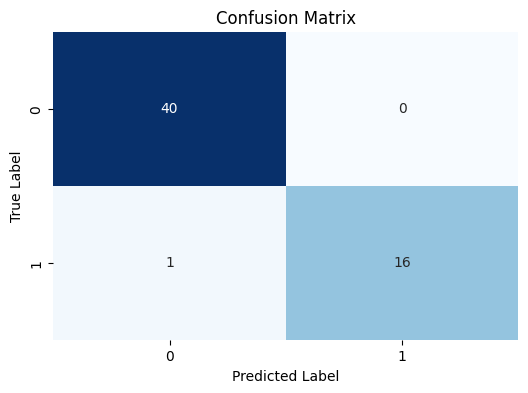

In [40]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()